## Exploratory Data Analysis (EDA)

In [1]:
# 1. Imports and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data from Day 1
df = pd.read_csv('cmapss_cleaned_train_FD001.csv')
df.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [2]:
# Dataset shape and brief info
print("Shape:", df.shape)
print(df.info())

# Engine and cycle range
print("Unique engines:", df['engine_id'].nunique())
print("Cycle range: {} - {}".format(df['cycle'].min(), df['cycle'].max()))


Shape: (20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_

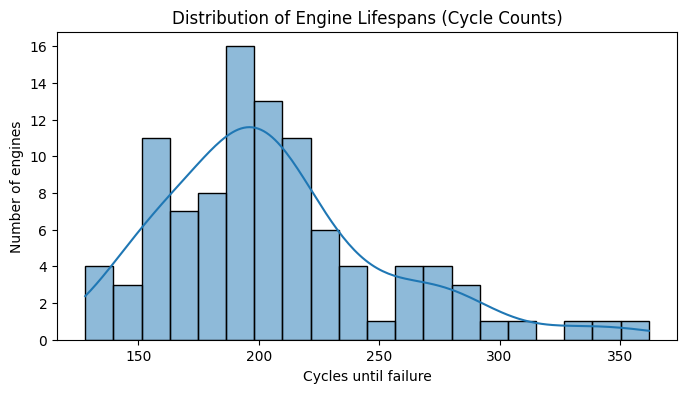

In [3]:
# Plot distribution of cycles per engine
cycle_counts = df.groupby('engine_id')['cycle'].max()
plt.figure(figsize=(8, 4))
sns.histplot(cycle_counts, bins=20, kde=True)
plt.title("Distribution of Engine Lifespans (Cycle Counts)")
plt.xlabel("Cycles until failure")
plt.ylabel("Number of engines")
plt.show()


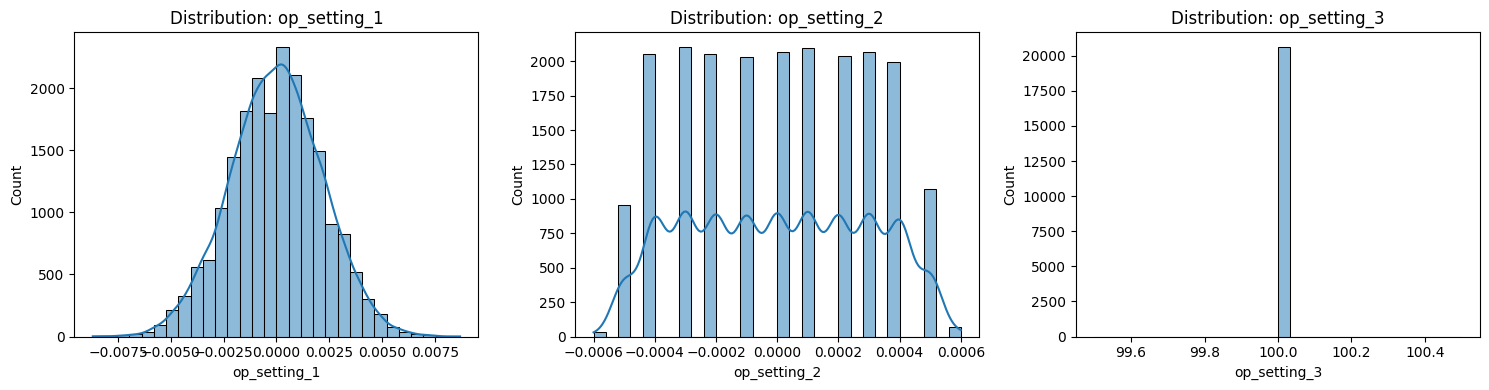

In [4]:
# Operational settings distributions
op_settings = ['op_setting_1', 'op_setting_2', 'op_setting_3']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(op_settings):
    sns.histplot(df[col], bins=30, ax=axs[idx], kde=True)
    axs[idx].set_title(f"Distribution: {col}")
plt.tight_layout()
plt.show()


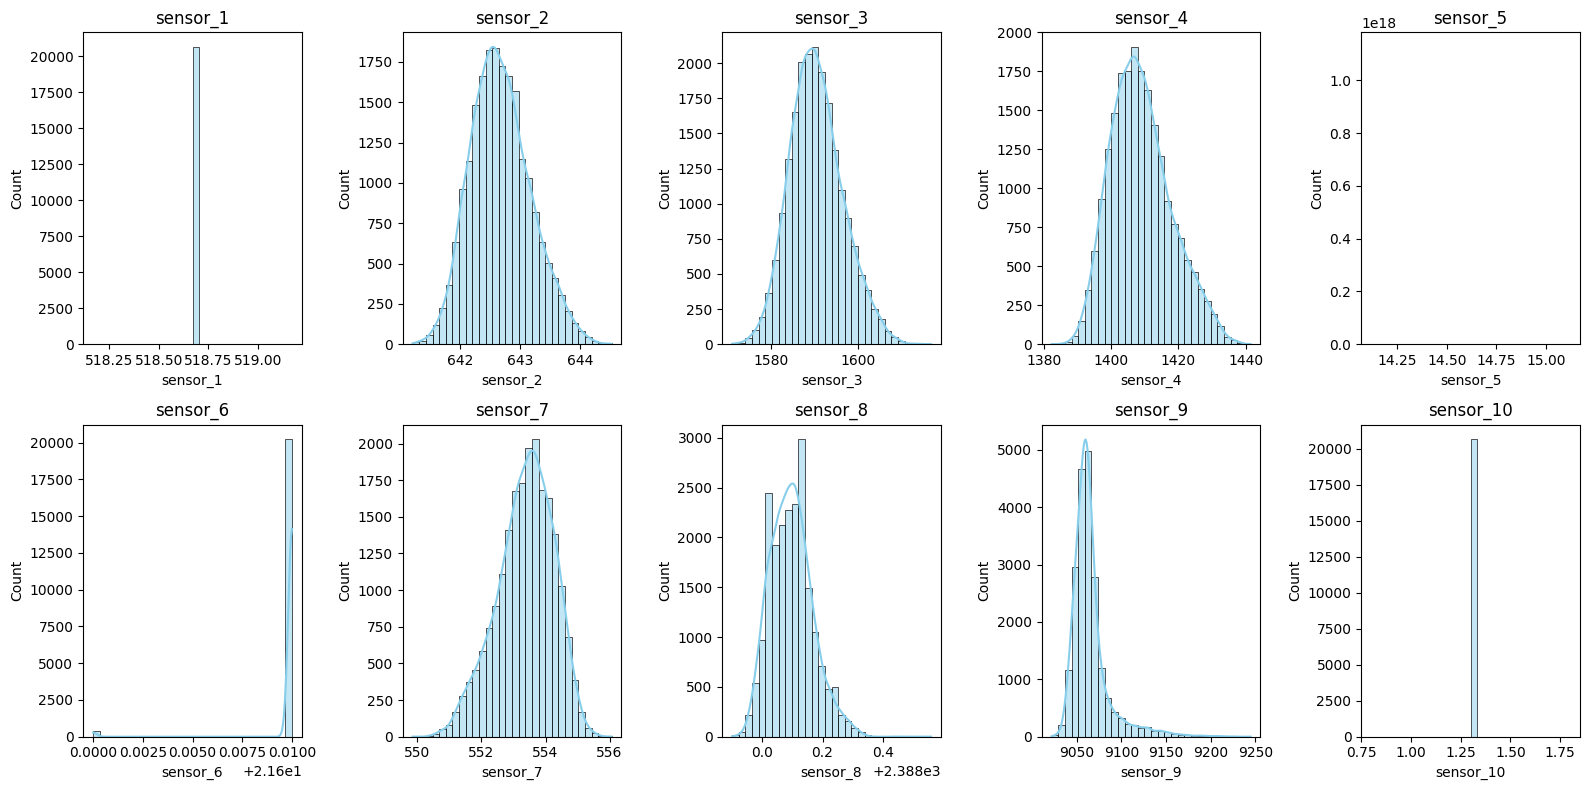

In [ ]:
    # Sensor example distributions
    sensor_cols = [col for col in df.columns if "sensor_" in col]
    plt.figure(figsize=(16,8))
    for i, col in enumerate(sensor_cols[:10], 1):   # Show first 10 sensors for brevity
        plt.subplot(2, 5, i)
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(col)
    plt.tight_layout()
    plt.show()


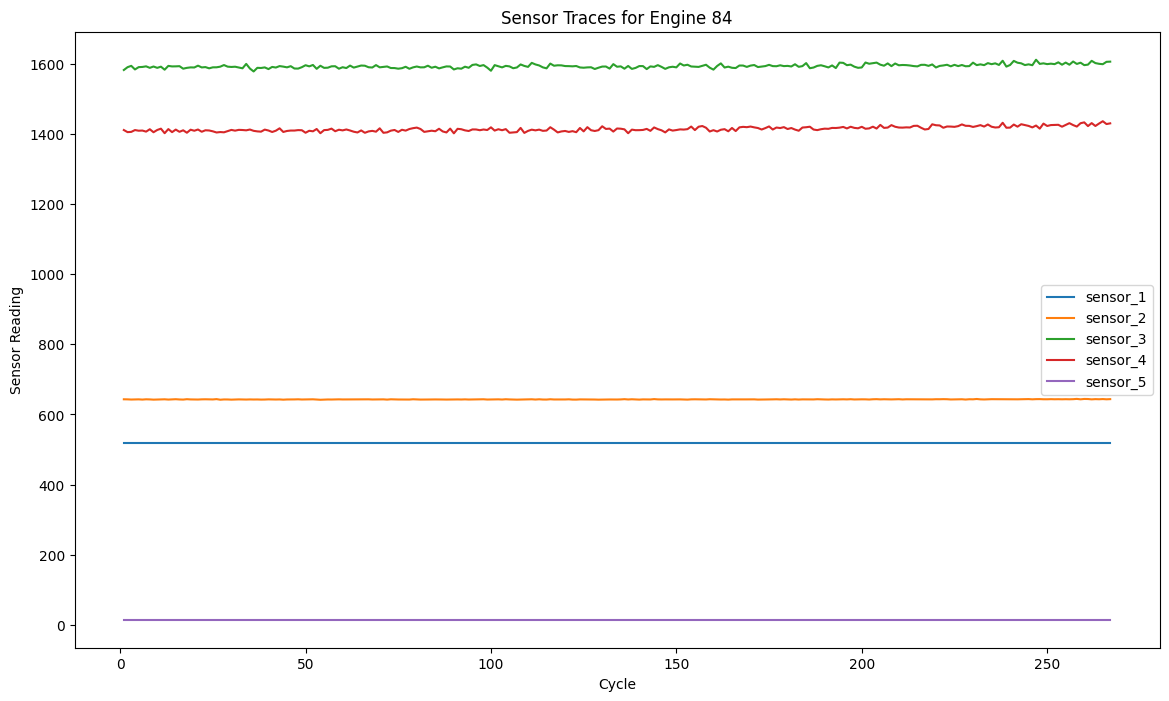

In [34]:
# Visualize a random engine's sensor history
engine_id = np.random.choice(df['engine_id'].unique())
sample = df[df['engine_id'] == engine_id]
plt.figure(figsize=(14,8))
for col in sensor_cols[:5]:   # First 5 sensors for example
    plt.plot(sample['cycle'], sample[col], label=col)
plt.title(f"Sensor Traces for Engine {engine_id}")
plt.xlabel("Cycle")
plt.ylabel("Sensor Reading")
plt.legend()
plt.show()


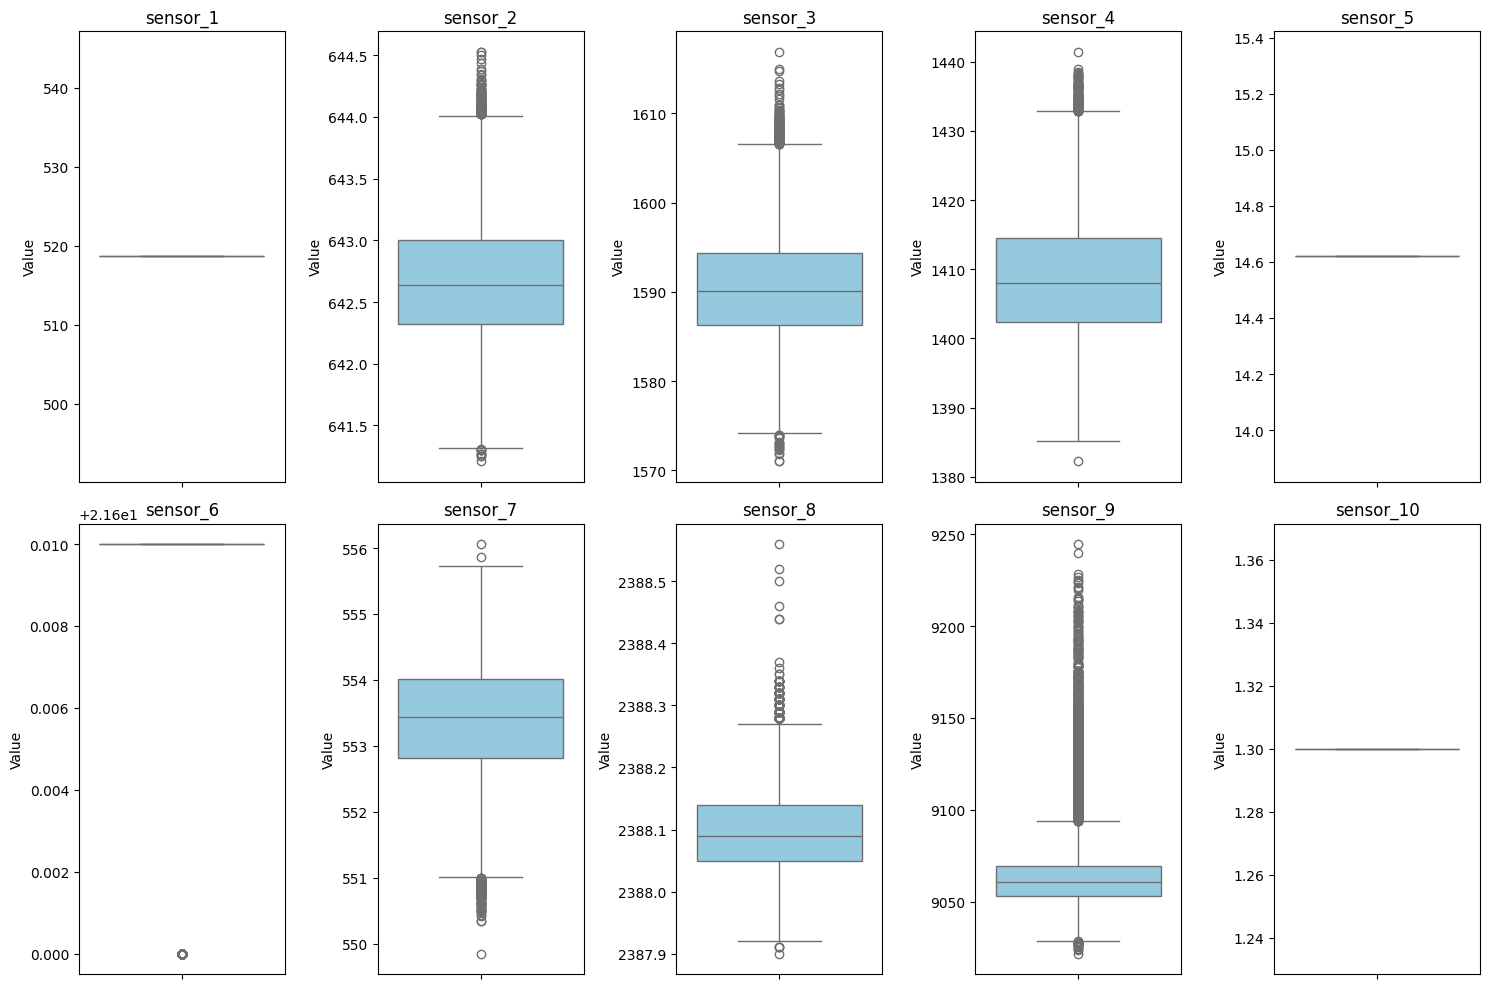

In [37]:
# Plot individual boxplots for each sensor (first 10 sensors as example)
sensor_cols = [col for col in df.columns if "sensor_" in col]

plt.figure(figsize=(15, 10))
for i, col in enumerate(sensor_cols[:10], 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.ylabel("Value")
plt.tight_layout()
plt.show()



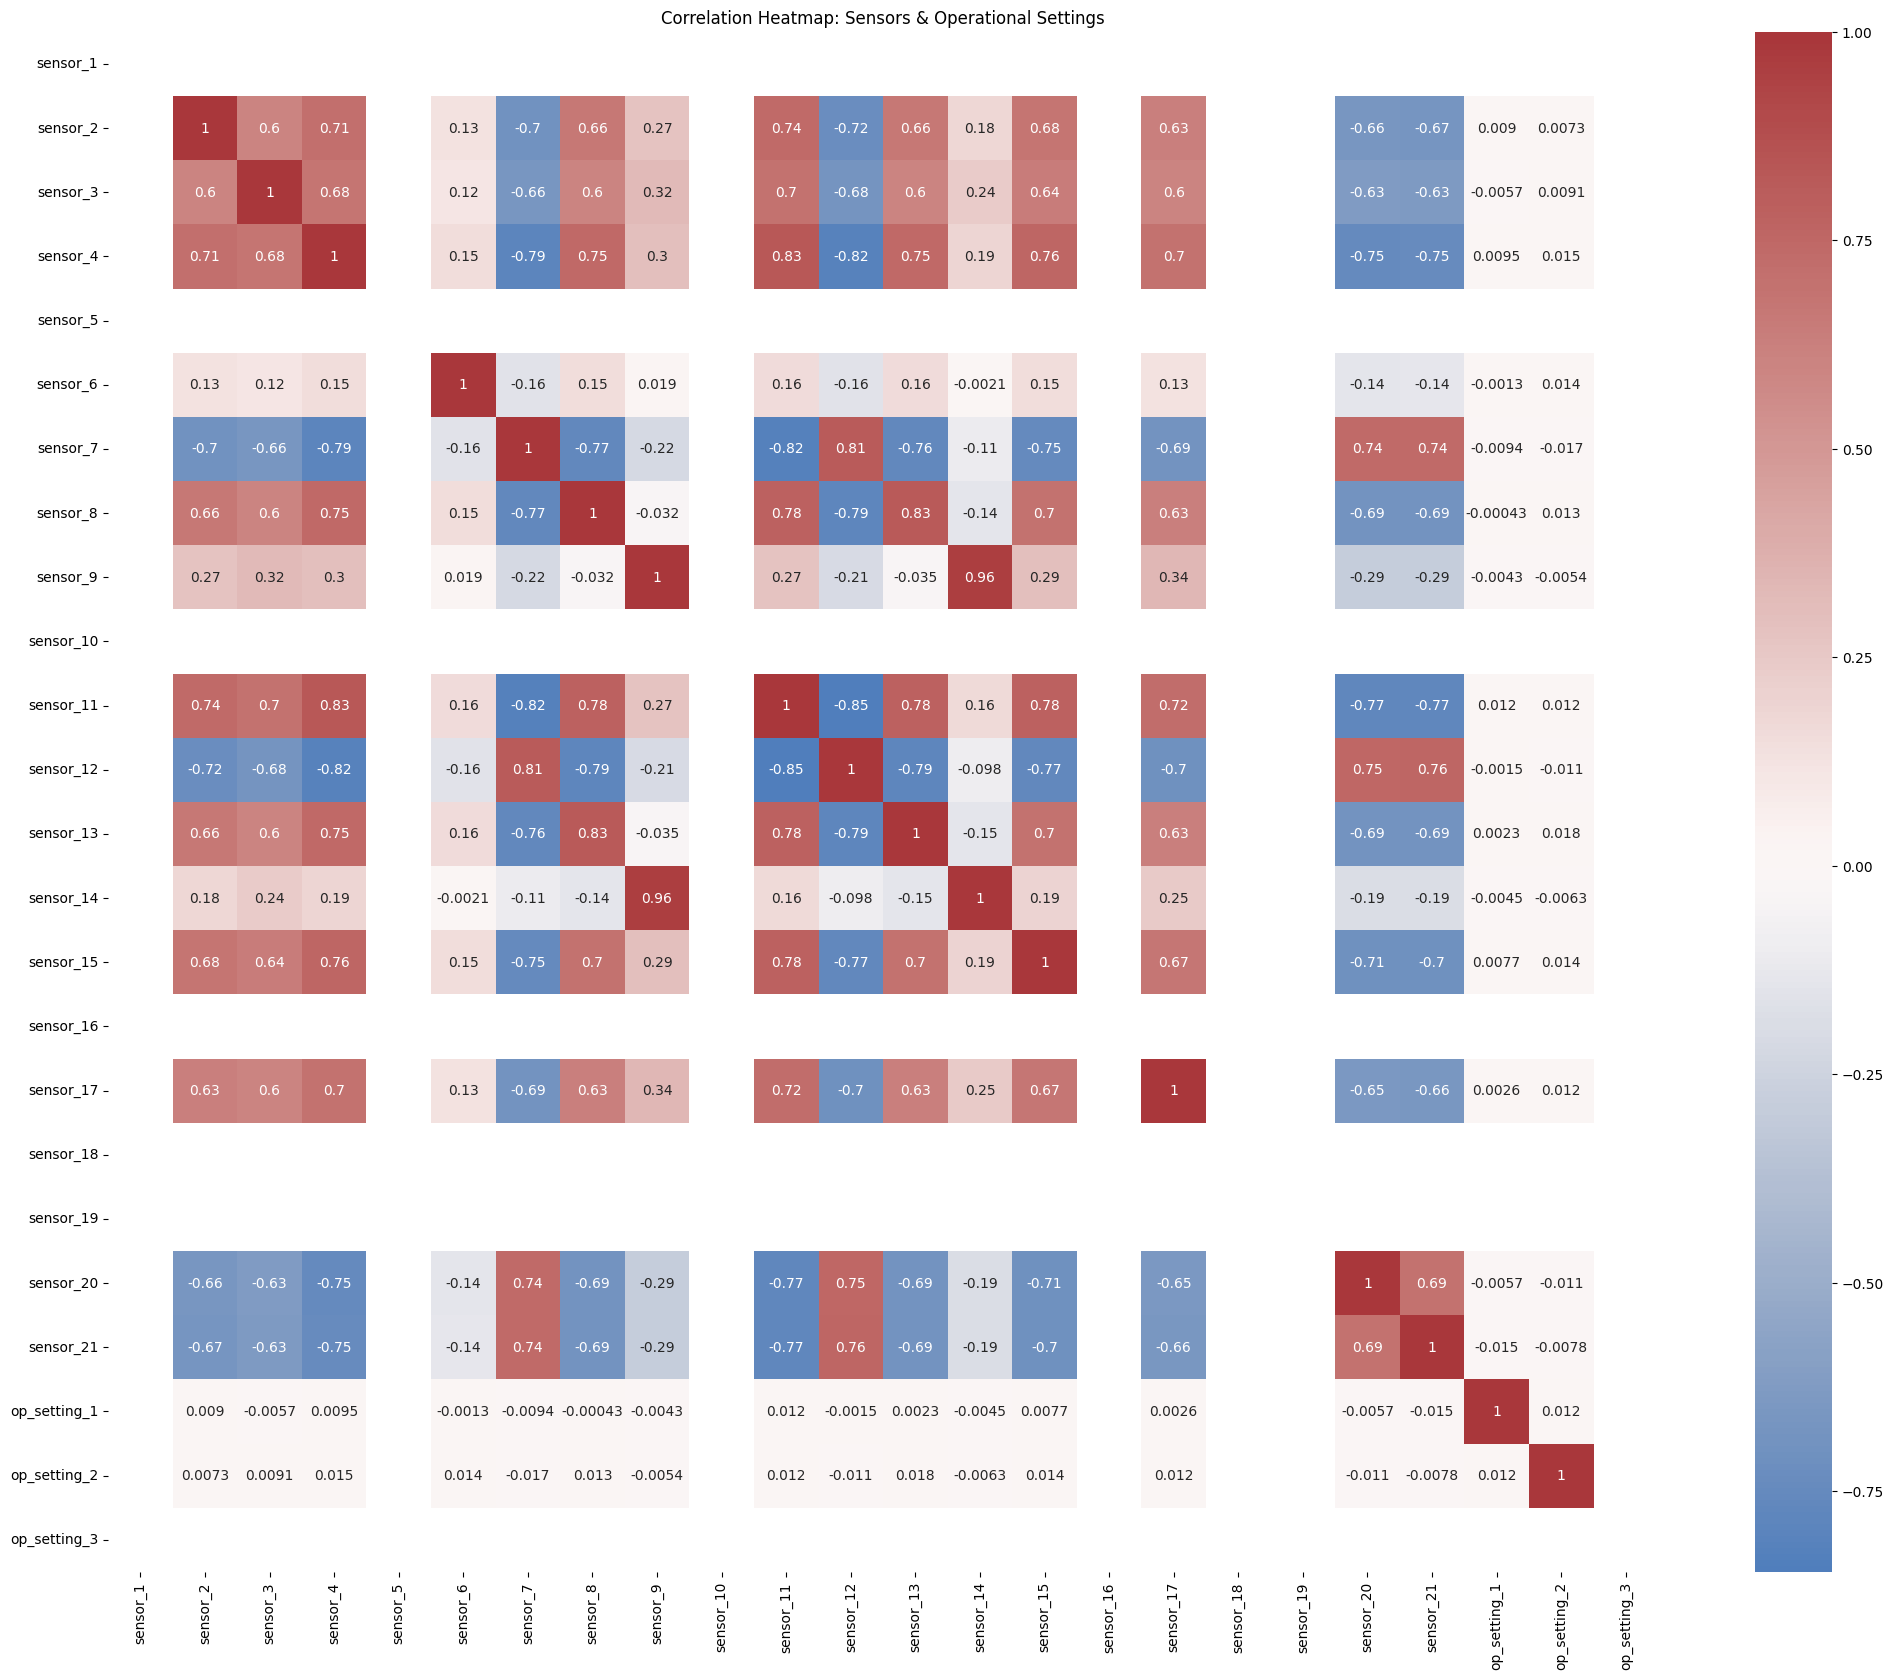

In [10]:
# Correlation matrix of sensors and operational settings
plt.figure(figsize=(25,20))
corr = df[sensor_cols + op_settings].corr()
sns.heatmap(corr, cmap='vlag', annot=True, center=0)
plt.title("Correlation Heatmap: Sensors & Operational Settings")
plt.show()


### EDA Summary Notes

#### Key Findings:
- Engine lifespans (cycle counts) show [describe shape – e.g., right-skewed].
- Operational settings [X and Y] have [describe trends, if visible].
- Some sensors (e.g., sensor_N) exhibit [constant values/outliers], which may not be informative and can be dropped or further investigated in preprocessing.
- Several sensors show significant correlation with each other.

#### Potential Issues/Next Steps:
- Some sensor readings may need normalization due to differing scales.
- Possible outliers or faulty sensors identified; confirm if these are expected or artifacts.
- Decide whether to drop uninformative or constant sensors before modeling.

